In [12]:
import requests
import re 
import nltk
import matplotlib.pyplot as plt
import os

from nltk.corpus import stopwords
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings('ignore')

In [46]:
#Scraping review using beautifulsoup
product_reviews=[]
for i in range(1,30):
    product=[]
#     url='https://www.flipkart.com/apple-macbook-air-core-i5-5th-gen-8-gb-128-gb-ssd-mac-os-sierra-mqd32hn-a-a1466/product-reviews/itmevcpqqhf6azn3?pid=COMEVCPQBXBDFJ8C&page='+str(i)
    url='https://www.amazon.in/Samsung-Galaxy-Phantom-Storage-Active/product-reviews/B08LRDHLQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response= requests.get(url)
#     print(url)
    # creating soup object to iterate over the extracted content 
    soup= bs(response.content,'html.parser')
    
    # Extracting the content under specific tags 
#     reviews=soup.findAll('div',attrs={'class','qwjRop'})
    reviews= soup.findAll('span',attrs={'class','a-size-base review-text review-text-content'})
#     reviews=soup.findAll('div',attrs={'class','qwjRop'})
    
    for i in range(len(reviews)):
        product.append(reviews[i].text)
    product_reviews=product_reviews + product

with open('product_reviews.txt','w',encoding='utf8') as output:
    output.write(str(product_reviews))

In [47]:
product_reviews

['\n\n  First let off is the adapter for charging the mobile is not provided. The problem is you need a type c adapter which you have to buy separately. Most importantly, it is not available from website to buy original samsung adapter. So you pay 80k to buy a phone without the adapter and then you buy a duplicate adapter for 3k...Dont buy this phone\n\n',
 '\n\n  Samsung processor is worst even 10 min of normal usage it gets heated upBattery life is very badSometimes freezes which is shameOnly camera is fine rest all i worstEven my s8 plus was far better than rhisTottaly waste of money\n\n',
 '\n\n  Processor is fast.\n\n',
 '\n\n  Samsung flagship doesn’t need any introduction but here is what i have liked and disliked in my usage since last couple of months.1. Exceptional screen - super smooth fluid screen. Colours are rich. Switch between 60 and 120 hz option is available.2. Pro camera - I am really impressed. I still prefer Google Pixel for camera in a phone and I believe no camer

In [48]:
os.getcwd()
# os.chdir("stop.txt")  

# Joining all the reviews into single paragraph 
product_rev_string = " ".join(product_reviews) 

# Removing unwanted symbols incase if exists
product_rev_string = re.sub("[^A-Za-z" "]+"," ",product_rev_string).lower()
product_rev_string = re.sub("[0-9" "]+"," ",product_rev_string)   

#here we are splitting the words as individual string
product_reviews_words = product_rev_string.split(" ")

# removing the stop words
# stop_words = stopwords('en')

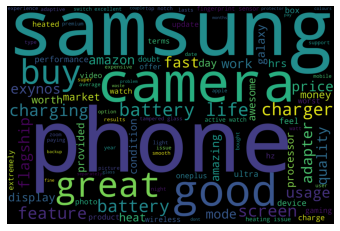

In [62]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]
product_reviews_words = [w for w in product_reviews_words if not w in stopwords]
product_rev_string = " ".join(product_reviews_words)
#creating word cloud for all words
wordcloud_product = WordCloud(background_color='black',width=3000,height=2000,max_words=100).generate(product_rev_string)
plt.axis('off')
plt.imshow(wordcloud_product)

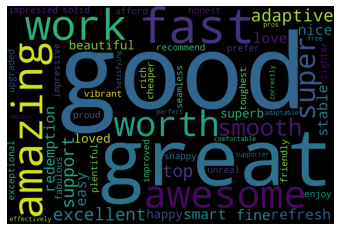

In [64]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[36:]

product_pos_in_pos = " ".join ([w for w in product_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(background_color='black',width=3000,height=2000).generate(product_pos_in_pos)
plt.axis('off')
plt.imshow(wordcloud_pos_in_pos)

#here we get wordcloud of all postive words in reviews

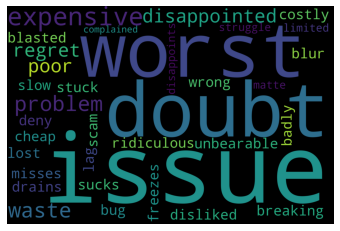

In [65]:
with open("negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    negwords = negwords[37:]

# negative word cloud
# Choosing the only words which are present in negwords
product_neg_in_neg = " ".join ([w for w in product_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(background_color='black',width=3000,height=2000).generate(product_neg_in_neg)
plt.axis('off')
plt.imshow(wordcloud_neg_in_neg)

#here we are getting the most repeated negative Wordcloud